## IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## IMPORT DATASET

In [2]:
dataset = pd.read_csv('salary_dataset.csv')
dataset

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
dataset.head()

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
dataset.tail()

,no,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


## HAPUS KOLOM "NO"

In [5]:
dataset = dataset.drop('no', axis=1)
dataset.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## VISUALISASI DATASET

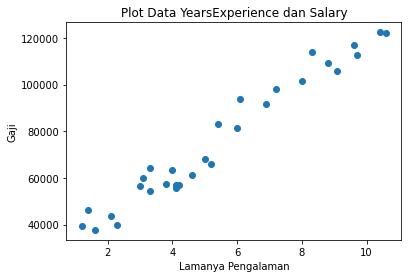

In [6]:
plt.scatter(dataset.YearsExperience, dataset.Salary)
plt.xlabel('Lamanya Pengalaman')
plt.ylabel('Gaji')
plt.title('Plot Data YearsExperience dan Salary')
plt.show()

In [7]:
dataset2 = pd.read_csv('ini_dataset/data-penjualan.csv', delimiter=';')
dataset2.head()

,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120


In [8]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   promosi    15 non-null     int64
 1   penjualan  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [9]:
dataset2.describe()

,promosi,penjualan
count,15.000000,15.000000
mean,53.866667,143.466667
std,19.657302,28.083718
min,25.000000,100.000000
25%,32.500000,114.500000
50%,60.000000,150.000000
75%,70.500000,165.500000
max,80.000000,180.000000


## VISUALISASI DATASET

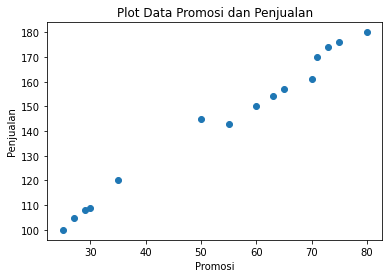

In [10]:
plt.scatter(dataset2.promosi, dataset2.penjualan)
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title('Plot Data Promosi dan Penjualan')
plt.show()

## KORELASI

In [11]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
dataset2.corr()

,promosi,penjualan
promosi,1.00000,0.99369
penjualan,0.99369,1.00000


## SPLIT KOLOM

In [13]:
# Membagi data x dan y

# data salary
x = dataset['YearsExperience'].values[:, np.newaxis] # sebagai x_train1
y = dataset['Salary'].values # sebagai y_train1

# coba split train-test = 70:30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

# data penjualan
promosi = dataset2['promosi'].values[:, np.newaxis] # sebagai x_train2
penjualan = dataset2['penjualan'].values # sebagai y_train2

# tidak pakai spit train_test karena datanya sedikit, jadi semua data dijadikan data latih

## MODELLING

In [14]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(x_train, y_train) # yang dipake data trainingnya
model2.fit(promosi, penjualan)

LinearRegression()

## TESTING

In [15]:
x_test

array([[ 1.6],
       [10.4],
       [ 4.2],
       [ 4. ],
       [ 9.6],
       [ 8.8],
       [ 9.7],
       [ 4.1],
       [ 5.4]])

In [16]:
# khusus split data
pred_salary = model1.predict(x_test)
print("Prediksi Gaji : ", pred_salary)

Prediksi Gaji :  [ 40818.78327049 123189.08258899  65155.46261459  63283.41035735
 115700.87356004 108212.66453108 116636.89968866  64219.43648597
  76387.77615802]


In [17]:
# dataset1
x_test_baru = [[9],[6]]
pred_salary_baru = model1.predict(x_test_baru)

# dataset2
promosi_test = [[45],[15]]
pred_penjualan = model2.predict(promosi_test)

print("Prediksi Gaji : ", pred_salary_baru)
print("Prediksi Penjualan : ", pred_penjualan)

Prediksi Gaji :  [110084.71678832  82003.93292974]
Prediksi Penjualan :  [130.87909447  88.28956449]


## VISUALISASI

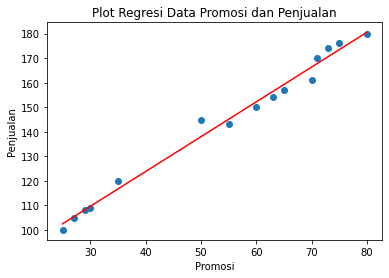

In [18]:
prediksi_penjualan = model2.predict(promosi)
dataframe_baru = pd.DataFrame({'promosi' : dataset2.promosi, 'penjualan' : prediksi_penjualan})
plt.scatter(dataset2.promosi, dataset2.penjualan)
plt.plot(dataframe_baru.promosi, dataframe_baru.penjualan, color='red')
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title('Plot Regresi Data Promosi dan Penjualan')
plt.show()

In [19]:
from sklearn.metrics import r2_score
akurasi = r2_score(dataset2, dataframe_baru)
print(akurasi*100)

99.37098507592287


## PEMBUKTIAN RUMUS

In [20]:
# Rumus Regresi -> y = a + bX (a = intercept, b = koefisien)
print("Koefisien : ", model2.coef_)
print("Intercept : ", model2.intercept_)

Koefisien :  [1.419651]
Intercept :  66.99479949720258


In [21]:
# Testing Rumus
y = model2.intercept_ + model2.coef_ * 27
print(y)

[105.32537648]
